# Importing Libraries

In [107]:
import numpy as np
import plotly.graph_objs as go

from plotly import subplots

# Data Distributions

In [108]:
data_rows = 10000

# uniform distribution
uniform_data = np.random.uniform(low=0, high=50, size=(data_rows, 1))

# normal distribution
normal_data = np.random.normal(loc=25, scale=5, size=(data_rows, 1))

# exponential distribution
exponential_data = np.random.exponential(scale=5, size=(data_rows, 1))

distributions =  {
    "uniform distribution (1, 50)": uniform_data,
    "normal distribution (mean=25, std=5)": normal_data,
    "exponential distribution (scale=5)": exponential_data
}

In [109]:
colors = {
    "uniform distribution (1, 50)": "#FFFFFF",
    "normal distribution (mean=25, std=5)": "#EFC3CA",
    "exponential distribution (scale=5)": "#FFECA1"
}

total_bins = 25
traces = []
for type, distribution in distributions.items():
    histogram, bins = np.histogram(distribution, bins=total_bins)
    traces.append(
        go.Bar(
            x=list(np.arange(len(histogram))), y=list(histogram),
            name=type, opacity=0.75, marker={"color": colors[type]}
        )
    )

fig = subplots.make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=0.05)
for index, trace in enumerate(traces):
    fig.add_trace(trace, row=index+1, col=1)
    fig.update_yaxes(title_text="Frequency", row=index+1, col=1)
fig.update_xaxes(title="Value", row=3, col=1)
fig.update_layout(
    title="Data Distributions", template="plotly_dark", hovermode="x unified",
    legend={"orientation": "h", "yanchor": "bottom", "xanchor": "right", "y": 5, "x": 1}
)
fig.write_html("data_distributions.html")

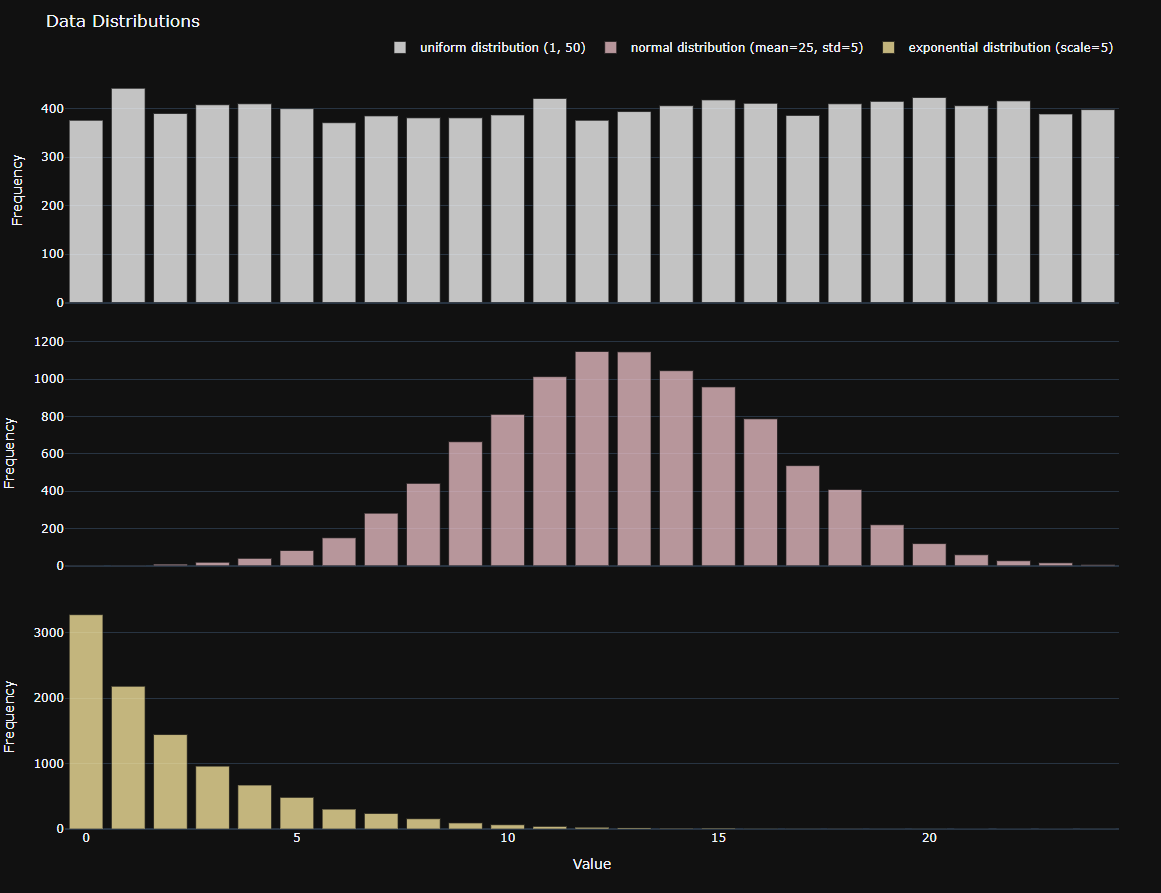

# Probability Distributions

Probability Mass Function (PMF): histogram_bin_value/data_rows  for all bins

Cumulative Density Function (CDF): sum(histogram_bin_value/data_rows) upto the current bin

Probability Density Function (PDF): slope(histogram_bin_value, next_histogram_bin_value) for all bins

PMF and PDF look the similar to the original histograms.

PMF and PDF has sum=1

In [110]:
pmfs = []
cdfs = []
pdfs = []
names = []

total_bins = 20

for type, distribution in distributions.items():
    histogram, bins = np.histogram(distribution, bins=total_bins)

    # pmf:
    pmf = histogram/data_rows
    pmfs.append(pmf)

    # cdf:
    cdf = np.asarray([np.sum(pmf[:bin]) for bin in range(total_bins)])
    cdfs.append(cdf)

    # pdf:
    pdf = np.asarray([cdf[bin] - cdf[bin-1] for bin in range(1, total_bins)])
    pdfs.append(pdf)

    names.append(type)

fig = subplots.make_subplots(
    rows=3, cols=3, shared_xaxes=True, shared_yaxes=True,
    horizontal_spacing=0.05, vertical_spacing=0.05, subplot_titles=("PMF", "CDF", "PDF")
)
index = 0
for pmf, cdf, pdf in zip(pmfs, cdfs, pdfs):
    x_values = np.arange(len(pmf))
    fig.add_trace(
        go.Bar(x=list(x_values), y=list(pmf), marker={"color": colors[names[index]]}, opacity=0.75, name=names[index]),
        row=index+1, col=1
    )
    fig.add_trace(
        go.Bar(x=list(x_values), y=list(cdf), marker={"color": colors[names[index]]}, opacity=0.75, name=names[index]),
        row=index+1, col=2
    )
    fig.add_trace(
        go.Bar(x=list(x_values), y=list(pdf), marker={"color": colors[names[index]]}, opacity=0.75, name=names[index]),
        row=index+1, col=3
    )
    fig.update_yaxes(title_text="Probability", row=index+1, col=1)
    fig.update_xaxes(title="Value", row=3, col=index+1)
    index += 1

fig.update_layout(
    title="Probability Distributions", template="plotly_dark", hovermode="x unified",
    showlegend=False
)
fig.write_html("probability_distributions.html")

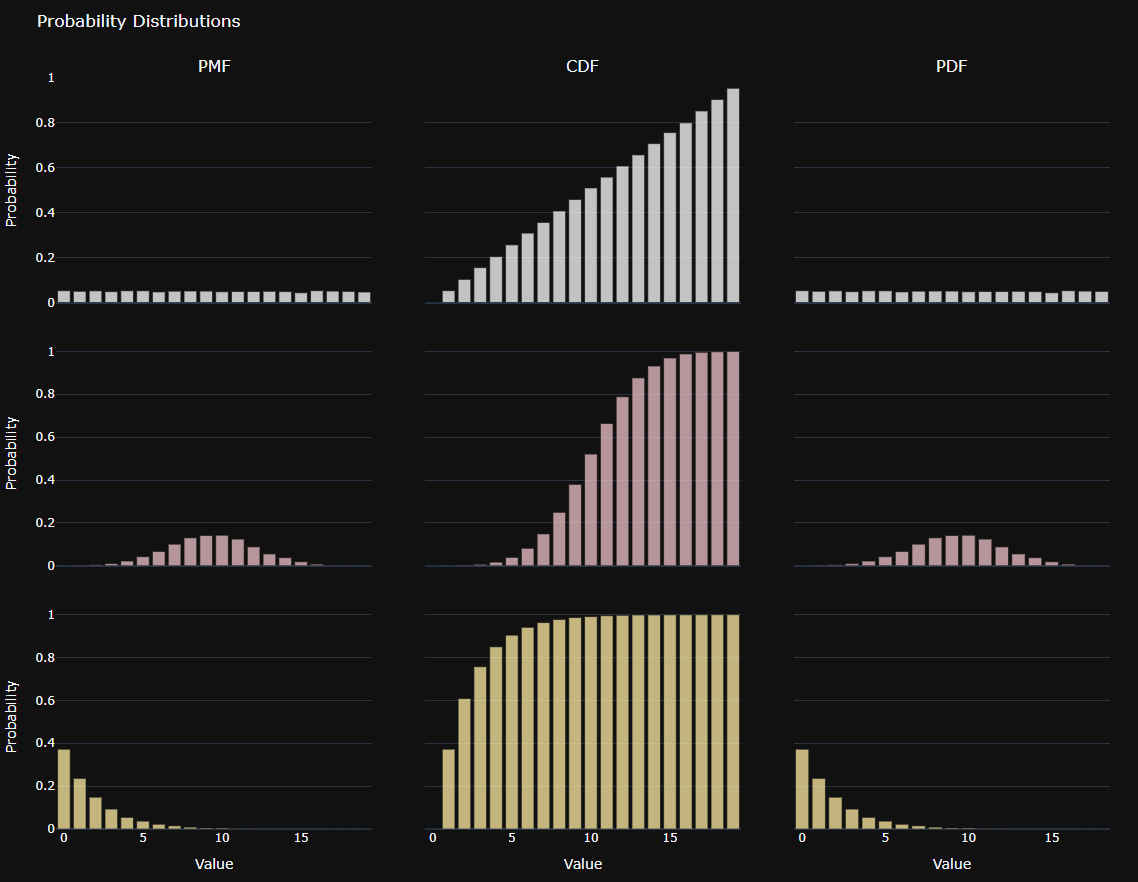

# Quantile-Quantile Plot

To check which ditribution the data belongs to:
1. standardize the data.
2. take similar or equal amount of data points from various suspected distributions for reference.
3. sort both and put them on either axis.
4. see where you get a strainght line!... ;) 
5. do random sampling if data is large.

In [111]:
standard_data_rows = 10000

standard_uniform_distribution = np.random.uniform(low=-5, high=5, size=(standard_data_rows,))

standard_normal_distribution = np.random.normal(loc=0, scale=1, size=(standard_data_rows,))

standard_exponential_distribution = np.random.exponential(scale=1, size=(standard_data_rows,))

standard_distributions = [
    standard_uniform_distribution, standard_normal_distribution, standard_exponential_distribution
]

In [112]:
fig = subplots.make_subplots(
    rows=3, cols=3, horizontal_spacing=0.05, vertical_spacing=0.05, shared_xaxes=True
)

types = []
distributions_list = []
for type, distribution in distributions.items():
    types.append(type)
    distributions_list.append((distribution - np.mean(distribution))/np.std(distribution))

for index, distribution in enumerate(distributions_list):
    for std_index, standard_distribution in enumerate(standard_distributions):
        fig.add_trace(
            go.Scatter(
                x=list(np.sort(distribution.reshape(1, -1)[0])), y=list(np.sort(standard_distribution)),
                marker={"color": colors[names[index]]}, mode="markers", name=types[index], opacity=0.7
            ), row=index+1, col=std_index+1
        )
        if std_index == 0:
            fig.update_yaxes(title="Standard Uniform", row=index+1, col=std_index+1)
        elif std_index == 1:
            fig.update_yaxes(title="Standard Normal", row=index+1, col=std_index+1)
        else:
            fig.update_yaxes(title="Standard Exponential", row=index+1, col=std_index+1)
        fig.update_xaxes(title=types[index], row=index+1, col=std_index+1)

fig.update_layout(
    title="Q-Q Plot", template="plotly_dark", hovermode="x unified", showlegend=False
)
fig.write_html("qq_plot.html")

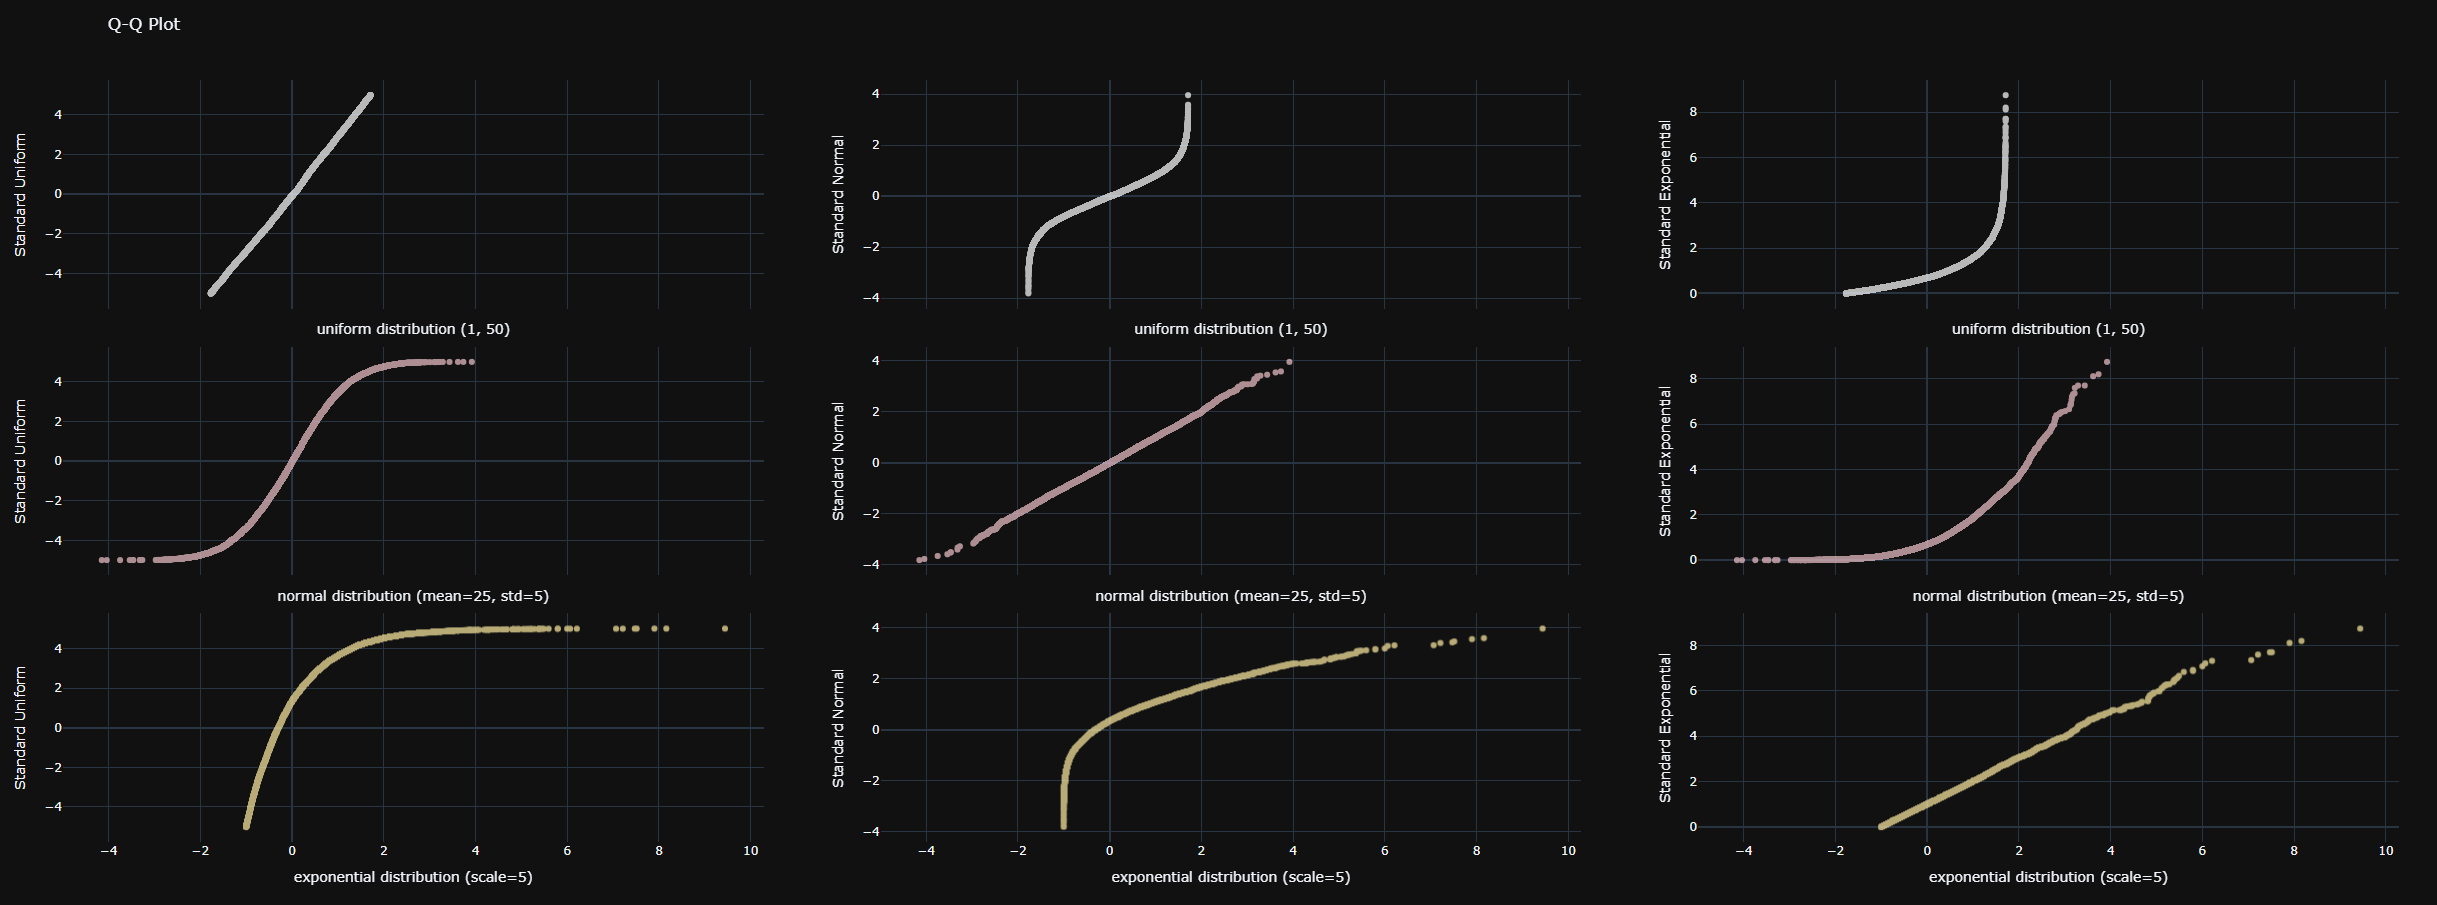